In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [248]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [225]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [226]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Starbucks_reviews_data.csv")
df.head(8)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images']
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images']
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images']


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [228]:
#check any null values in review feature
df.isna().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [229]:
#drop the null values
df = df[~df['Rating'].isna()]
df = df.reset_index(drop=True)

In [230]:
df.isna().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

In [231]:
df.shape

(705, 6)

In [232]:
#drop unwanted features
df=df.drop(['location','Date','Image_Links'],axis=1)
df.head()

,name,Rating,Review
0,Helen,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,5.0,I just wanted to go out of my way to recognize...
3,Taylor,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [233]:
plt.style.use('ggplot')

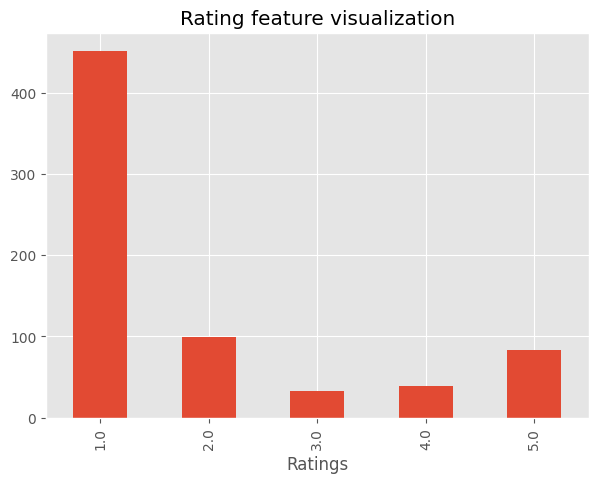

In [234]:
#visualize the rating feature
ax = df['Rating'].value_counts().sort_index().plot(kind='bar',title='Rating feature visualization',figsize=(7, 5))
ax.set_xlabel('Ratings')
plt.show()

In [235]:
#use SentimentIntensityAnalyzer to get the polarity for the review
Analyzer = SentimentIntensityAnalyzer()
df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: x.replace('\n', ' '))
df['Review'] = df['Review'].apply(lambda x: x.replace(' ', ' ').strip())
df['sentiment'] = df['Review'].apply(lambda x: Analyzer.polarity_scores(x))
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0.05 else 'negative')

In [236]:
df.head(5)

,name,Rating,Review,sentiment,sentiment_label
0,Helen,5.0,amber and ladonna at the starbucks on southwes...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",positive
1,Courtney,5.0,** at the starbucks by the fire station on 436...,"{'neg': 0.099, 'neu': 0.755, 'pos': 0.145, 'co...",positive
2,Daynelle,5.0,i just wanted to go out of my way to recognize...,"{'neg': 0.087, 'neu': 0.767, 'pos': 0.145, 'co...",positive
3,Taylor,5.0,me and my friend were at starbucks and my card...,"{'neg': 0.053, 'neu': 0.682, 'pos': 0.265, 'co...",positive
4,Tenessa,5.0,i’m on this kick of drinking 5 cups of warm wa...,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",positive


In [237]:
#create individual feature for the polarity
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

In [238]:
df.head(7)

,name,Rating,Review,sentiment,sentiment_label,neg,neu,pos,compound
0,Helen,5.0,amber and ladonna at the starbucks on southwes...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",positive,0.000,0.797,0.203,0.8991
1,Courtney,5.0,** at the starbucks by the fire station on 436...,"{'neg': 0.099, 'neu': 0.755, 'pos': 0.145, 'co...",positive,0.099,0.755,0.145,0.7766
2,Daynelle,5.0,i just wanted to go out of my way to recognize...,"{'neg': 0.087, 'neu': 0.767, 'pos': 0.145, 'co...",positive,0.087,0.767,0.145,0.5242
3,Taylor,5.0,me and my friend were at starbucks and my card...,"{'neg': 0.053, 'neu': 0.682, 'pos': 0.265, 'co...",positive,0.053,0.682,0.265,0.9698
4,Tenessa,5.0,i’m on this kick of drinking 5 cups of warm wa...,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",positive,0.000,0.669,0.331,0.9793
5,Alyssa,1.0,we had to correct them on our order 3 times. t...,"{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...",negative,0.109,0.891,0.000,-0.7269
6,ken,1.0,i have tried starbucks several different times...,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",negative,0.233,0.767,0.000,-0.8963


In [239]:
df = df.drop('sentiment', axis=1)

In [240]:
df.head()

,name,Rating,Review,sentiment_label,neg,neu,pos,compound
0,Helen,5.0,amber and ladonna at the starbucks on southwes...,positive,0.000,0.797,0.203,0.8991
1,Courtney,5.0,** at the starbucks by the fire station on 436...,positive,0.099,0.755,0.145,0.7766
2,Daynelle,5.0,i just wanted to go out of my way to recognize...,positive,0.087,0.767,0.145,0.5242
3,Taylor,5.0,me and my friend were at starbucks and my card...,positive,0.053,0.682,0.265,0.9698
4,Tenessa,5.0,i’m on this kick of drinking 5 cups of warm wa...,positive,0.000,0.669,0.331,0.9793


In [241]:
df.iloc[1,2]

'** at the starbucks by the fire station on 436 in altamonte springs, fl made my day and finally helped me figure out the way to make my drink so i’d love it. she took time out to talk to me for 2 minutes to make my experience better than what i’m used to. it was much appreciated! i’ve had bad experiences one after another at the starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. niko was refreshing to speak to and pleasant. the drink was perfect! store 11956'

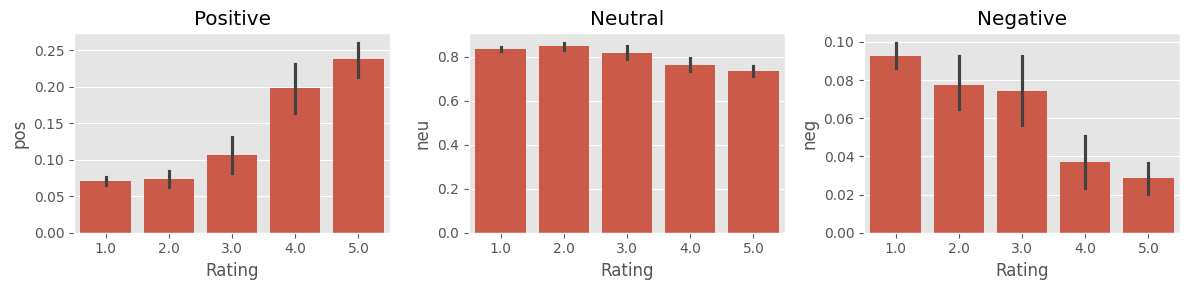

In [247]:
#visualize neg,neu,pos features individually in barplot
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=df, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=df, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

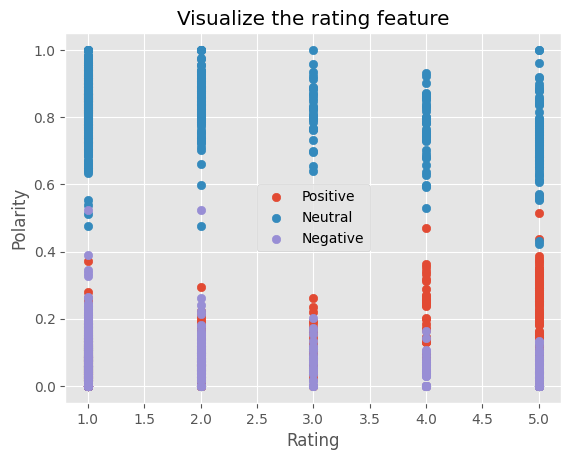

In [243]:
fig, ax = plt.subplots()
ax.scatter(df['Rating'], df['pos'], label='Positive')
ax.scatter(df['Rating'], df['neu'], label='Neutral')
ax.scatter(df['Rating'], df['neg'], label='Negative')
ax.set_title('Visualize the rating feature')
ax.set_xlabel('Rating')
ax.set_ylabel('Polarity')
ax.legend(loc='center')
plt.show()

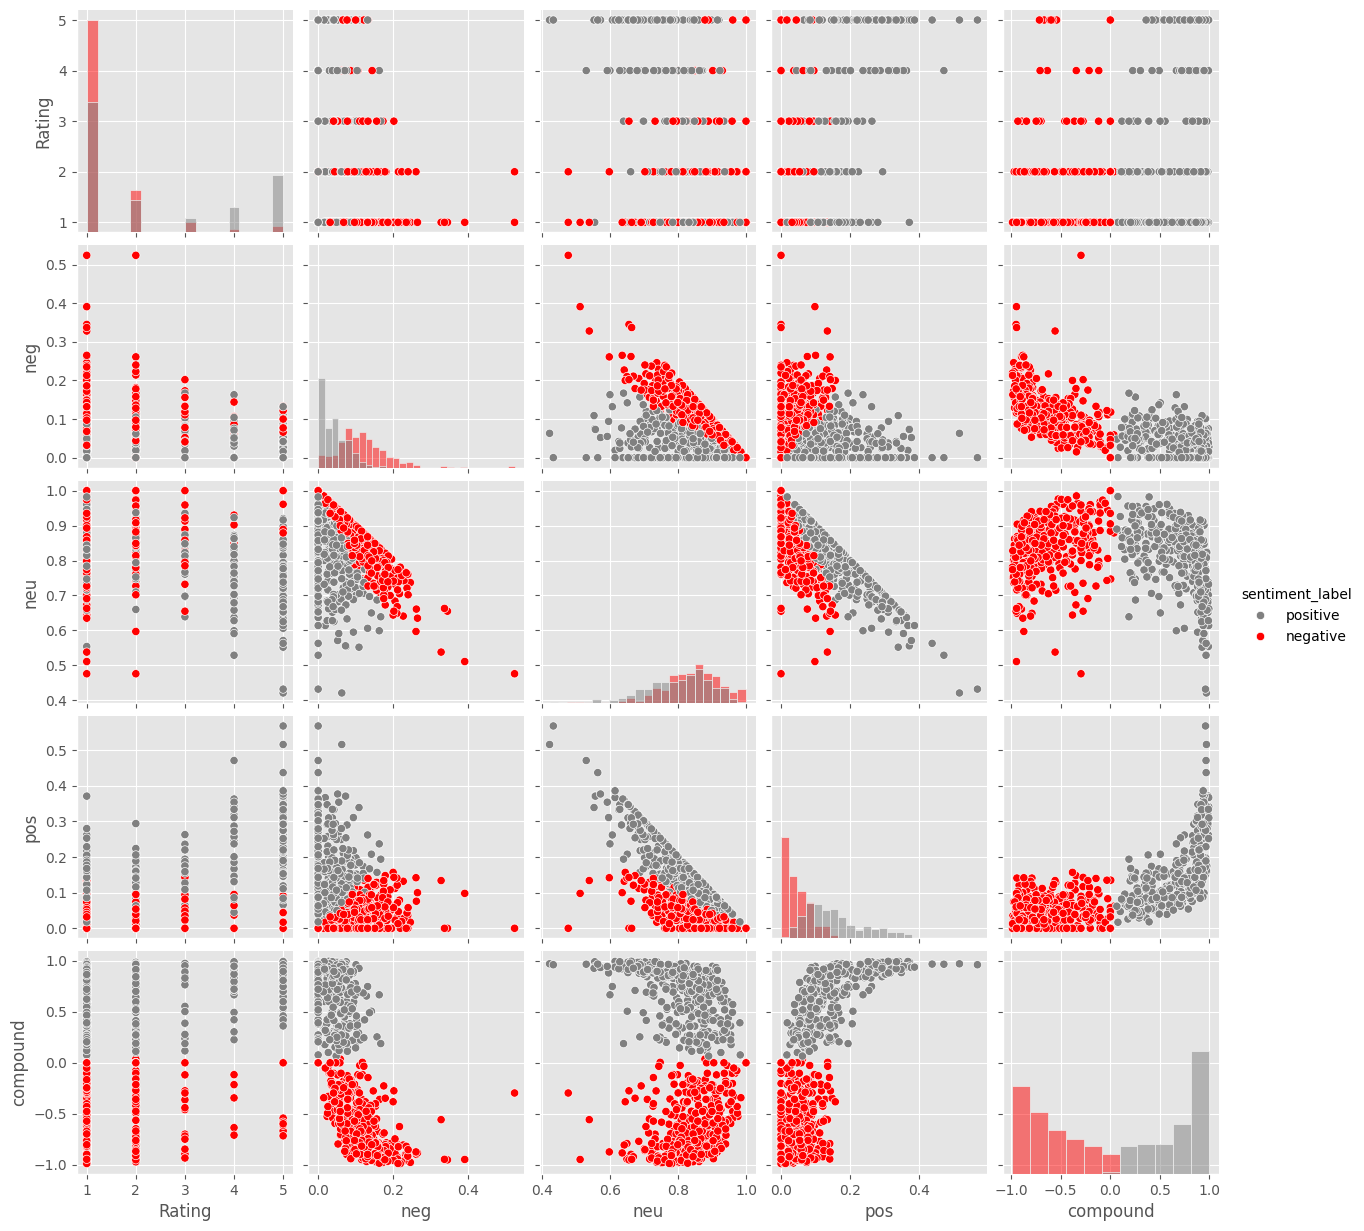

In [244]:
sns.pairplot(df, hue='sentiment_label', palette=['grey', 'red'], diag_kind='hist')
plt.show()

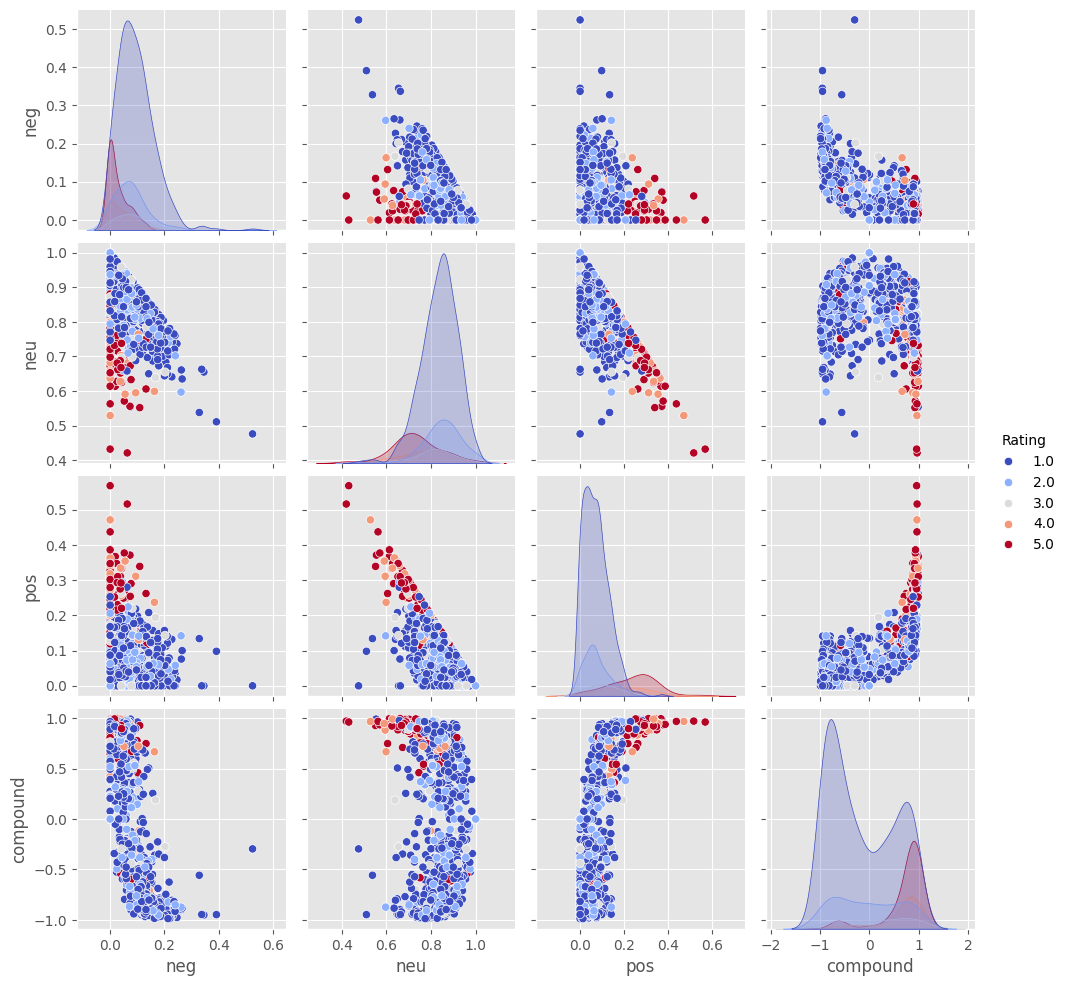

In [250]:
sns.pairplot(df, hue='Rating', palette='coolwarm')
plt.show()

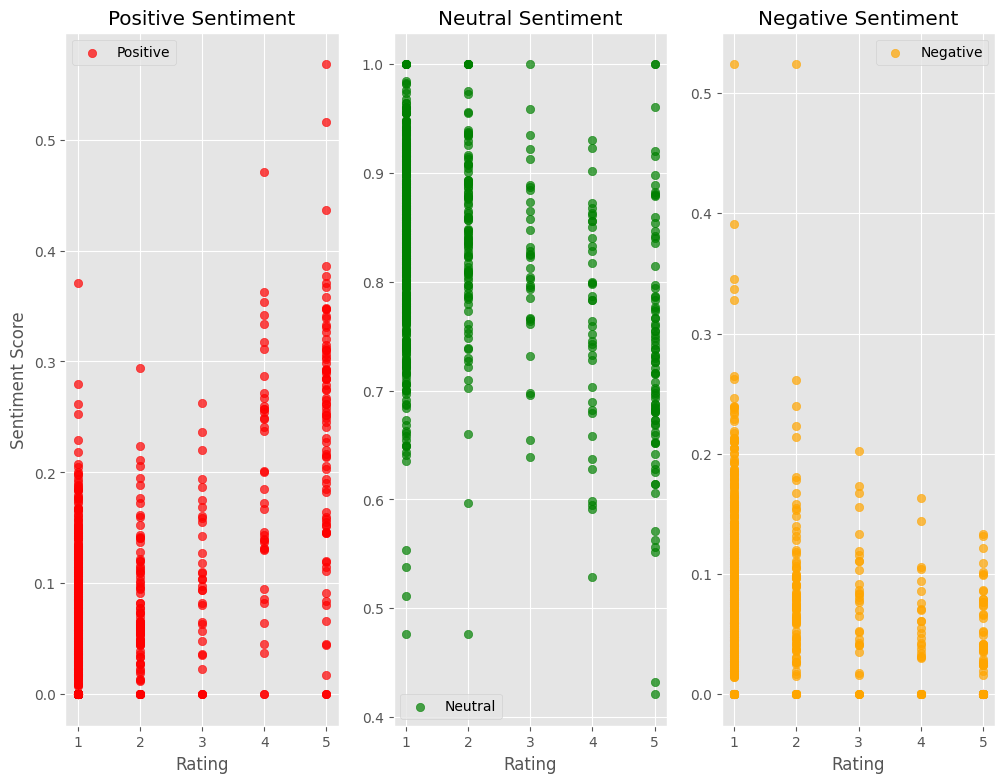

In [246]:
#visualize neg,neu,pos features individually in scatter plot

plt.style.use('ggplot')
fig, axs = plt.subplots(1, 3, figsize=(12, 9))

axs[0].scatter(df['Rating'], df['pos'], c='red', alpha=0.7, label='Positive')
axs[0].set_title('Positive Sentiment')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Sentiment Score')
axs[0].legend()

axs[1].scatter(df['Rating'], df['neu'], c='green', alpha=0.7, label='Neutral')
axs[1].set_title('Neutral Sentiment')
axs[1].set_xlabel('Rating')
axs[1].legend()

axs[2].scatter(df['Rating'], df['neg'], c='orange', alpha=0.7, label='Negative')
axs[2].set_title('Negative Sentiment')
axs[2].set_xlabel('Rating')
axs[2].legend()
plt.show()
